# Projektna naloga: Interval index
## 1.del - Testiranje poti $P_n$


$$
Int(G) = \sum_{\{u,v\} \subset V} \left( |I_G(u, v)| - 1 \right) 
$$ 
$$
I(u,v) = \{w \in V : d(u,w) + d(w,v) = d(u,v)\}
$$

In [ ]:
from sage.all import *
from sage.graphs.graph import Graph
from sage.graphs.graph_generators import graphs
import random
from random import choice
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt


In [6]:

def interval_index(G):

    V = G.vertices()  # dobimo vsa vozlišča
    Int_G = 0
    
    # Iteriramo cez  vse pare vozlišč {u, v}
    for u in V:
        for v in V:
            # Izognemo se dvojnemu stetju (u,v) in (v,u) in (u,u)!
            if u >= v:
                continue
            d_uv = G.distance(u, v)    # poiscemo razdaljo
            
            interval_size = 0   # števec za |I(u,v)|
            
            for w in V:
                d_uw = G.distance(u, w)
                d_wv = G.distance(w, v)
                
                if d_uw + d_wv == d_uv:
                    interval_size += 1
            
            Int_G += (interval_size - 1)
            
            
    return Int_G

In [7]:
def interval_index_2(G):      #se ena definicija za intervalni indeks
    
    if not G.is_connected():
        return None
        
    n = G.order()
    dist = G.distance_matrix()      
    Int = 0
    
    for i in range(n):
        for j in range(i+1, n):
            d = dist[i][j]
            count = sum(1 for k in range(n) if dist[i][k] + dist[k][j] == d)
            Int += count - 1          
    return Int

#### Testiranje funkcije na primeru 

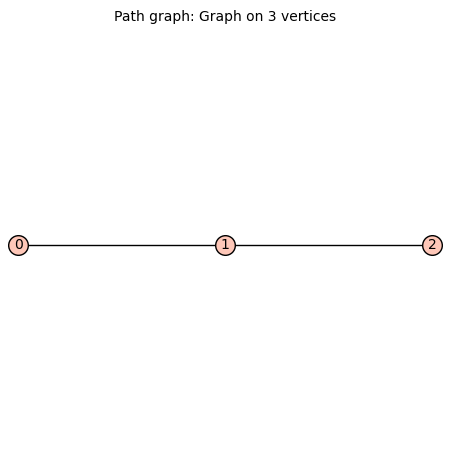

In [8]:

M = graphs.PathGraph(3)
M

In [9]:
print(interval_index(M))
print(interval_index_2(M))     #se ujemajo definicije

4
4


In [10]:
"""Izpis intervalnega indeksa za pot za nekatere n"""
indeksi_poti = []

for i in range(0,100):
    indeks = interval_index(graphs.PathGraph(i))
    indeksi_poti.append((i, indeks))

indeksi_poti_DF = pd.DataFrame(indeksi_poti, columns=["stevilo vozlišč", "Int(P_n)"])
indeksi_poti_DF.style.hide(axis='index')


stevilo vozlišč,Int(P_n)
0,0
1,0
2,1
3,4
4,10
5,20
6,35
7,56
8,84
9,120


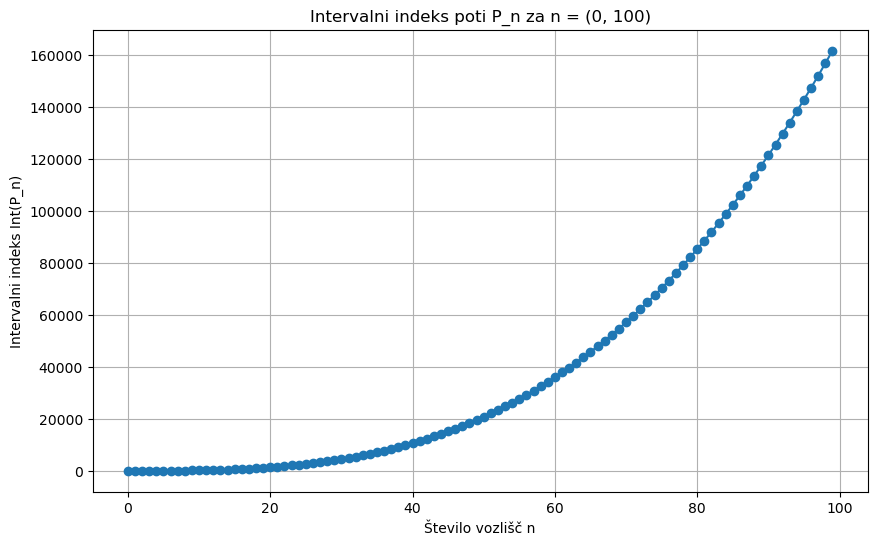

In [36]:
"""Prikaz na grafu"""
plt.figure(figsize=(10, 6))
plt.plot(indeksi_poti_DF["stevilo vozlišč"], indeksi_poti_DF["Int(P_n)"], marker='o')

plt.xlabel("Število vozlišč n")
plt.ylabel("Intervalni indeks Int(P_n)")
plt.title("Intervalni indeks poti P_n za n = (0, 100)")

plt.grid(True)



#### Testrianje poti z nauty_geng (generiramo vse grafe na n vozliščih)

In [26]:
def test_path_maximal(n_max):
    
    """Za vsako n od 3 do n_max preveri, ali ima Pn največji Int(G) med vsemi povezanimi grafi na n vozliščih."""
    
    for n in range(3, n_max + 1):
        P = graphs.PathGraph(n)     # generiramo graf
        int_P = interval_index(P)
    
        max_found = int_P   #zaenkrat najboljsi graf kar pot
        
        print(f"n = {n:2d}:  P_{n} → Int = {int_P}")
        
        # Pregledamo vse povezane grafe na n vozliščih 
        graf_z_max = "P_n"
        
        #if n <= 9:     za n = 10 moramo preveriti vec kot 11 milijonov grafov 
        for G in graphs.nauty_geng(f"{n} -c"):  # samo povezani, zato -c
            val = interval_index(G)
            if val > max_found:
                max_found = val
                graf_z_max = G.graph6_string()  #Pomagamo si z graph6, saj je grafov zelo veliko za risati, zato jih lažje predstavimo kot nize
                print(f"Najden boljši graf Int = {val}  (graph6: {graf_z_max})")
        
        if max_found == int_P:
            print(f"→ P_{n} doseže maksimum (Int = {int_P})\n")
        else:
            print(f"→ P_{n} NI maksimalna Največji Int = {max_found}\n")

In [30]:
test_path_maximal(9)

n =  3:  P_3 → Int = 4
→ P_3 doseže maksimum (Int = 4)

n =  4:  P_4 → Int = 10
→ P_4 doseže maksimum (Int = 10)

n =  5:  P_5 → Int = 20
→ P_5 doseže maksimum (Int = 20)

n =  6:  P_6 → Int = 35
→ P_6 doseže maksimum (Int = 35)

n =  7:  P_7 → Int = 56
→ P_7 doseže maksimum (Int = 56)

n =  8:  P_8 → Int = 84
→ P_8 doseže maksimum (Int = 84)

n =  9:  P_9 → Int = 120
→ P_9 doseže maksimum (Int = 120)



In [ ]:
test_path_maximal(10)
# za n = 8 precej hitro naredi, za vecje n = 10 pa po 1512 min se ni uspelo...

n =  3:  P_3 → Int = 4
→ P_3 doseže maksimum (Int = 4)

n =  4:  P_4 → Int = 10
→ P_4 doseže maksimum (Int = 10)

n =  5:  P_5 → Int = 20
→ P_5 doseže maksimum (Int = 20)

n =  6:  P_6 → Int = 35
→ P_6 doseže maksimum (Int = 35)

n =  7:  P_7 → Int = 56
→ P_7 doseže maksimum (Int = 56)

n =  8:  P_8 → Int = 84
→ P_8 doseže maksimum (Int = 84)

n =  9:  P_9 → Int = 120
→ P_9 doseže maksimum (Int = 120)

n = 10:  P_10 → Int = 165


KeyboardInterrupt: 

#### Testiranje še z graphs.RandomGNP, ki generira nakjučne grafe
Čeprav zgornja funkcija z ukazom nauty geng zajame vse grafe za majhne n; je precej počasna, zato je smiselno definirati naslednjo funkcijo, ki naključno genrira grafe tudi za velike n


In [13]:
def nakljucni_grafi(n, st=200):
    grafi = []
    while len(grafi) < st:
        G = graphs.RandomGNP(n, 0.3)  # naključni graf z verjetnostjo roba 0.3
        if G.is_connected():
            grafi.append(G)
    return grafi



def test_path_vs_random(n, ponovitve=100):
    
    rezultati = []

    P = graphs.PathGraph(n)
    Int_P = interval_index(P)

    grafi = nakljucni_grafi(n, st=300)
    

    for m in range(1, ponovitve + 1):
        G = random.choice(grafi)
        Int_G = interval_index(G)

        rezultati.append({
            'Izbira': f'Poskus {m}',
            'Int(P_n)': Int_P,
            'Int(random G)': Int_G,
            'P_n_boljsi': (Int_P >= Int_G),  # gledamo true ali false
            'G_graph6': G.graph6_string()   # za izpis najboljega grafa
        })

    return pd.DataFrame(rezultati)


def analiza(df):  
    """ Funkcija, namenjena izpisu za boljši pregled rezultata"""
    stevilo = len(df)
    boljsi = sum(df['P_n_boljsi'])

    print(f"Število poskusov: {stevilo}")
    print(f"P_n ima večji intervalni indeks v {boljsi} primerih.")
    print(f"Delež: {boljsi/stevilo:.2%}")   # damo v procente in zaokrozimo na dve decimalki
    print()

    print(df.to_string(index=False))  # samo za to da v bistvu ne izpisujemo dvakrat indeksov, ker smo dali ze prej
    


n = 100
df = test_path_vs_random(n, ponovitve=100)
analiza(df)


Število poskusov: 100
P_n ima večji intervalni indeks v 100 primerih.
Delež: 100.00%

    Izbira Int(P_n) Int(random G)  P_n_boljsi                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      G_graph6
  Poskus 1   166650         34998     

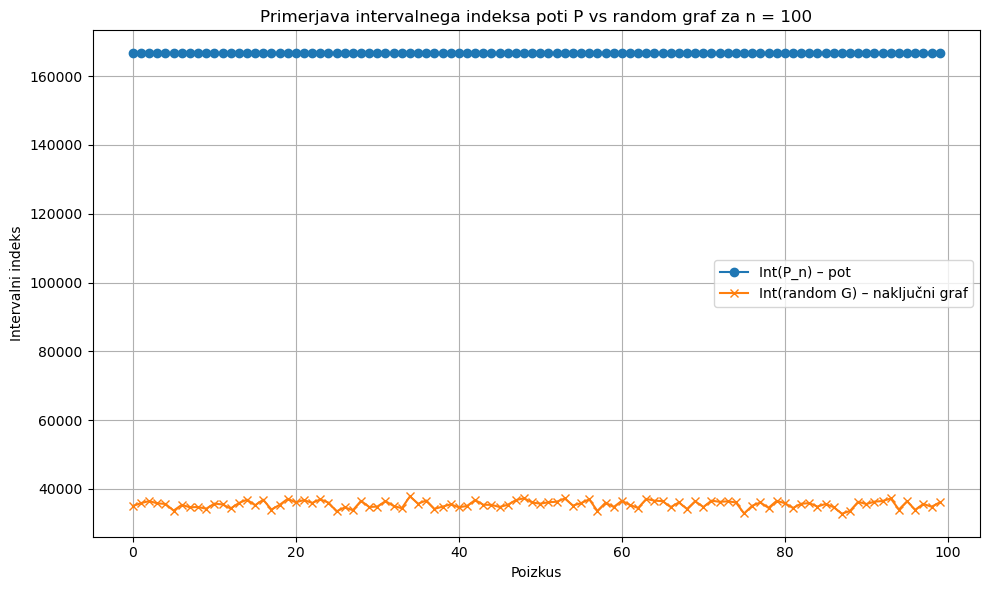

In [14]:
"""Prikaz poti vs random graf za n = 100"""

x = range(len(df))  
Int_P = df["Int(P_n)"]
Int_G = df["Int(random G)"]

plt.figure(figsize=(10,6))

plt.plot(x, Int_P, label="Int(P_n) – pot", marker='o')
plt.plot(x, Int_G, label="Int(random G) – naključni graf", marker='x')

plt.xlabel("Poizkus")
plt.ylabel("Intervalni indeks")
plt.title("Primerjava intervalnega indeksa poti P vs random graf za n = 100")

plt.legend()
plt.grid(True)
plt.tight_layout()



Kateri od zgornjih grafov se še najbolje približal poti za izbran n?

Izbira                                                   Poskus 35
Int(P_n)                                                    166650
Int(random G)                                                37805
P_n_boljsi                                                    True
G_graph6         ~?@cK@H?dBGEdW__@?BMEwC?gAIW_aJd[?A??k_DWEjcOT...
Name: 34, dtype: object
Najboljši graf (graph6): ~?@cK@H?dBGEdW__@?BMEwC?gAIW_aJd[?A??k_DWEjcOTA\XTXis?ROYfKORGoAAgp?bJC`TBSGGC_IT]?d?SRW?AfiAvAFJPEAB_gu_WGO_@G_abFM?@k?oOio_dGP?`B[@SE`cCg@]THSq?CFaova@G`GyBAH?TPDW_AmGOP_TZ?CaTsxAl?g?SS`_peCDGDdY?_]IG`??G`Pm@_]agAK`Am_qIYP[G?H}ke_QOGD@[QA?_b?MMV|]_?@_NE_pQ?A_}bZ??C?ONP?[D?pbCGaC?moCOiSWo?oPN_W`QCGKGGCcTMR@_hDaI_o?bCyXg_PSUcL?ZBUCW_eKTSHKOaOdwgBEKOSIcOIJyUY?AT?OnfD[gE?`?gWOAADrC?jCF?SOOGUCQ?aZCAL?XONWA@FOG@_HCW@wah@BTCsODbOg[?_???bGaR_?AYp?A@BoAF??sACg_P?BZ?BgaAJHTRRaO@`KKID[PP@nt[S`O?y_?OgcG@?u?PCAKQ?aG?NO?eA_oHCJA?aUC_?NC?CE[?HMCmO@RL@EHE@CWD_J`SWcCY@?tDdSk?dBqHACAKFaZIIW_B??@sFbO|TC?eAAdQ??c@]gWjsgPAKpJsu

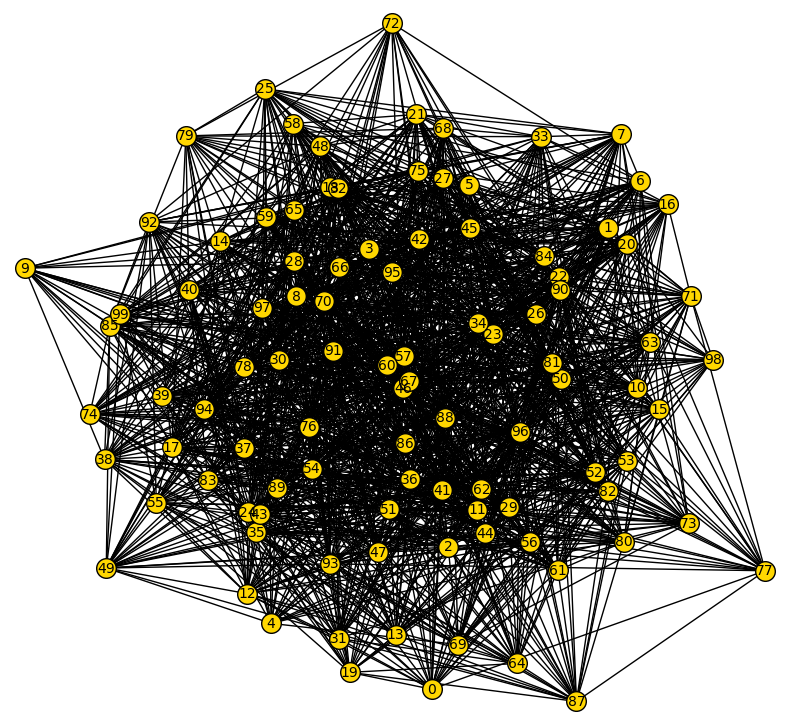

In [23]:
max_val = df["Int(random G)"].max()
vrstica = df.loc[df["Int(random G)"].idxmax()]
print(vrstica)

best_graph6 = vrstica["G_graph6"]
print("Najboljši graf (graph6):", best_graph6)

najboljsi = Graph(best_graph6)
najboljsi.show(layout='spring', vertex_size=200, vertex_color='gold', figsize=[8,8])
